In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from StringIO import StringIO 
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 12.0) 


In [38]:
#define the column start and end points
cols=[(0,4),(5,9),(10,15),(16,24),(25,32),(33,41),(42,49),(50,57),(58,64),(65,72),(73,74),(75,76),(77,85),(86,88)]
cols+=[(89,92),(93,112),(113,118),(119,124),(125,130),(131,136),(137,142),(143,148),(149,154),(155,160),(161,166)]
cols+=[(167,172),(173,179),(180,186)]

#read in the data
data=pd.read_fwf("virgo_data.txt",colspecs=cols,skiprows=57,header=None)

#rename the columns
data.rename(columns={0:'idEVC',1:'idVC',2:'ngc',3:'RAdeg',4:'DEdeg',5:'FRAdeg',6:'FDEdeg',7:'Offset'},inplace=True)
data.rename(columns={8:'SRvel',9:'NRvel',10:'memIn',11:'memVC',12:'pmorph',13:'smorph',14:'nmorph'},inplace=True)
data.rename(columns={15:'vmorph',16:'umag',17:'eumag',18:'gmag',19:'egmag',20:'rmag',21:'ermag'},inplace=True)
data.rename(columns={22:'imag',23:'eimag',24:'zmag',25:'ezmag',26:'rad',27:'r50'},inplace=True)


In [39]:
data.describe()

,idEVC,idVC,RAdeg,DEdeg,FRAdeg,FDEdeg,Offset,SRvel,NRvel,nmorph,...,gmag,egmag,rmag,ermag,imag,eimag,zmag,ezmag,rad,r50
count,1589.000000,913.000000,1589.000000,1589.000000,1324.000000,1324.000000,1324.000000,1324.000000,1153.000000,1589.000000,...,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,907.570799,1030.464403,187.193104,9.262071,187.161304,9.764634,2.767591,1392.231949,1473.727754,303.557583,...,15.565721,0.021313,15.069717,0.021446,14.771938,0.021534,14.643656,0.038633,52.583902,12.938320
std,650.409924,605.943826,4.206295,6.105173,4.152023,5.956675,7.438201,764.773385,2969.529847,89.822866,...,1.979145,0.017085,2.055478,0.009658,2.097612,0.010262,2.161827,0.057276,47.720349,10.503226
min,1.000000,1.000000,175.077100,-4.579600,175.077100,-3.682400,0.000000,-745.000000,-730.500000,100.000000,...,8.980000,0.020000,8.280000,0.020000,7.840000,0.020000,7.600000,0.031000,4.980000,0.850000
25%,398.000000,491.000000,184.841100,5.283700,184.813425,5.765700,0.241400,902.325000,894.300000,207.000000,...,14.370000,0.020000,13.870000,0.020000,13.570000,0.020000,13.380000,0.031000,24.050000,6.270000
50%,795.000000,1011.000000,186.942900,9.879000,186.870550,10.344800,0.652500,1310.250000,1306.800000,300.000000,...,15.940000,0.021000,15.460000,0.021000,15.140000,0.021000,15.000000,0.032000,38.600000,10.160000
75%,1192.000000,1554.000000,189.830300,13.322500,189.799550,13.581700,1.808575,1988.675000,1972.500000,401.000000,...,17.120000,0.021000,16.700000,0.021000,16.400000,0.021000,16.320000,0.036000,63.910000,16.280000
max,2264.000000,2095.000000,199.589000,24.921000,199.531600,24.923000,86.492300,2982.400000,98609.100000,411.000000,...,20.630000,0.653000,20.560000,0.346000,19.670000,0.327000,19.620000,1.621000,476.730000,101.240000


In [40]:
print data['SRvel'].mean()/3e5 #redshift and it's std, consistent with NED!
print data['SRvel'].std()/3e5

0.00464077316213
0.00254924461669


In [69]:
data.loc[data['NRvel']>5000]

,idEVC,idVC,ngc,RAdeg,DEdeg,FRAdeg,FDEdeg,Offset,SRvel,NRvel,...,gmag,egmag,rmag,ermag,imag,eimag,zmag,ezmag,rad,r50
313,314,300,NaN,184.6758,5.6654,184.6757,5.6654,0.2138,1389.0,98609.1,...,18.01,0.022,17.21,0.022,16.92,0.021,16.65,0.035,24.28,6.55
1182,1183,NaN,NaN,192.4152,12.6259,192.4146,12.6253,2.8596,834.4,7669.2,...,15.01,0.020,14.44,0.020,14.17,0.020,14.07,0.032,108.17,21.86


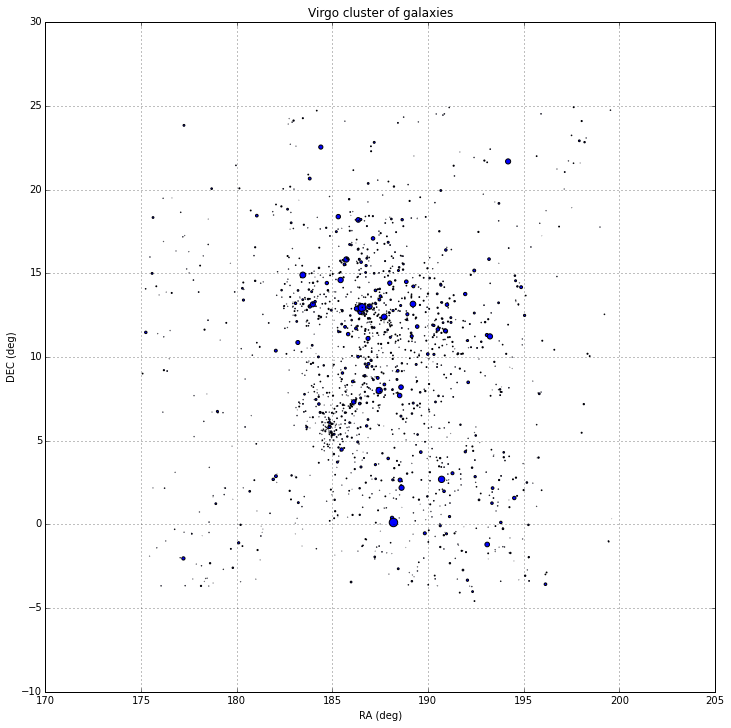

In [42]:
#plt.polar(True)
plt.scatter(data['RAdeg'],data['DEdeg'],s=np.pi*(data['rad']/100.)**2)
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('Virgo cluster of galaxies')

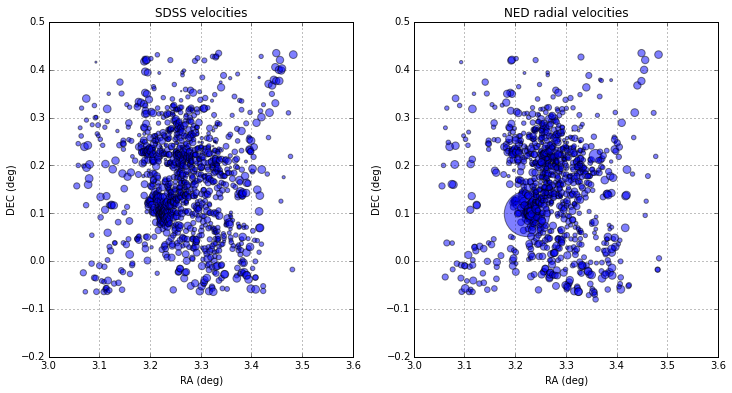

In [43]:
f = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(np.pi*data['RAdeg']/180.,np.pi*data['DEdeg']/180.,s=np.pi*(data['SRvel'])/150., alpha=0.5)
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('SDSS velocities')
plt.subplot(1, 2, 2)
plt.scatter(np.pi*data['RAdeg']/180.,np.pi*data['DEdeg']/180.,s=np.pi*(data['NRvel'])/150., alpha=0.5)
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('NED radial velocities')


In [44]:
#df = pd.DataFrame(data)
members = data.loc[data['memIn'] == 'M']
possible_memb = data.loc[data['memIn'] == 'P']
print "we have", members.shape[0], "certain members and", possible_memb.shape[0], "possible members"

we have 1028 certain members and 561 possible members


In [45]:
#members.describe() # notice different means

In [46]:
#possible_memb.describe()

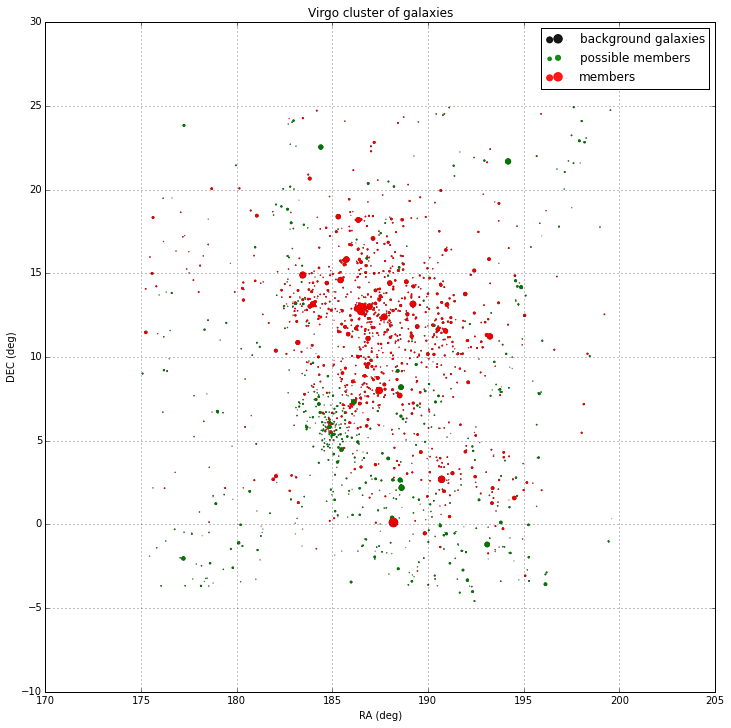

In [47]:
plt.scatter(data['RAdeg'],data['DEdeg'],s=np.pi*(data['rad']/100.)**2, color='black', alpha=0.9, label="background galaxies")
plt.scatter(possible_memb['RAdeg'],possible_memb['DEdeg'],s=np.pi*(possible_memb['rad']/100.)**2, color='green', alpha=0.9, label="possible members")
plt.scatter(members['RAdeg'],members['DEdeg'],s=np.pi*(members['rad']/100.)**2, color='red', alpha=0.9, label="members")
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend(loc='upper right')
plt.title('Virgo cluster of galaxies')
plt.xlim=(np.amin(data['RAdeg']), np.amax(data['RAdeg'])) # I don't know why this is not working, but nvm
plt.show()
#print np.amin(data['RAdeg']), np.amax(data['RAdeg'])

In [48]:
mem_and_pmem = data.loc[data['memIn'].isin(('M', 'P'))]

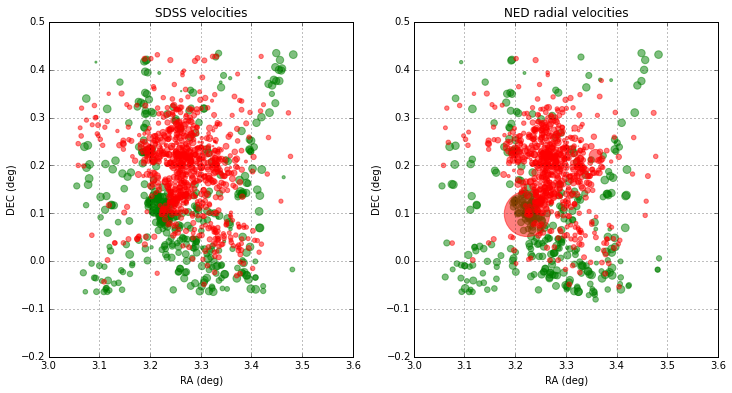

In [49]:
f = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(np.pi*possible_memb['RAdeg']/180.,np.pi*possible_memb['DEdeg']/180.,s=np.pi*(possible_memb['SRvel'])/150., alpha=0.5, color='green')
plt.scatter(np.pi*members['RAdeg']/180.,np.pi*members['DEdeg']/180.,s=np.pi*(members['SRvel'])/150., alpha=0.5, color='red')
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('SDSS velocities')
plt.subplot(1, 2, 2)
plt.scatter(np.pi*possible_memb['RAdeg']/180.,np.pi*possible_memb['DEdeg']/180.,s=np.pi*(possible_memb['NRvel'])/150., alpha=0.5, color='green')
plt.scatter(np.pi*members['RAdeg']/180.,np.pi*members['DEdeg']/180.,s=np.pi*(members['NRvel'])/150., alpha=0.5, color='red')
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('NED radial velocities')


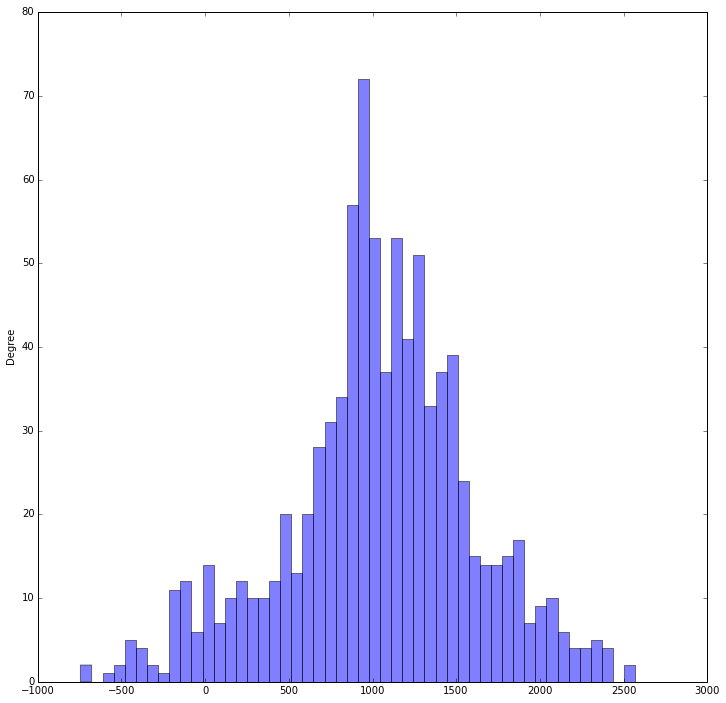

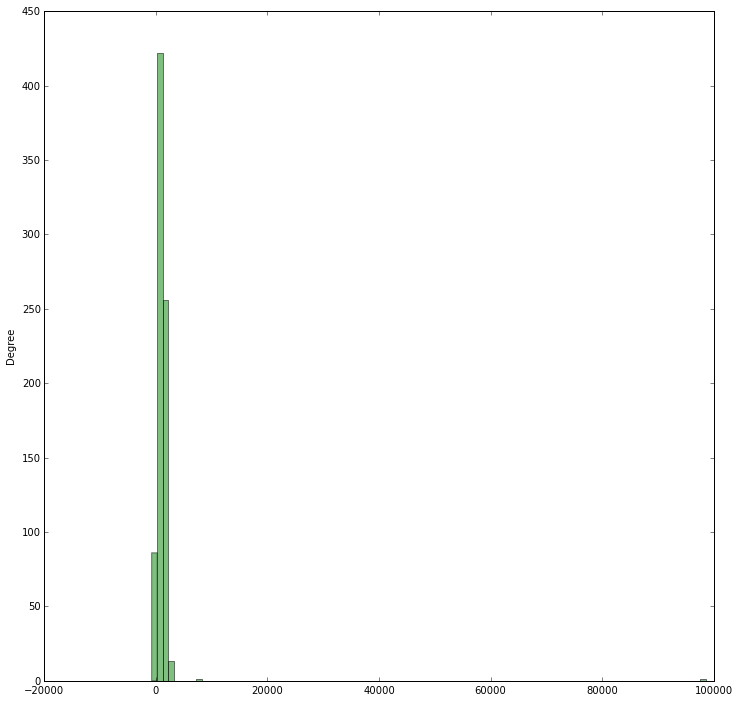

In [50]:
#plt.hist(members['SRvel'][~np.isnan(members['SRvel'])])
members['SRvel'].plot(kind='hist',color='blue', alpha=0.5, bins=50)
plt.show()
members['NRvel'].plot(kind='hist',color='green', alpha=0.5, bins=100)
plt.show()

In [51]:
print "this is the fishy point, so we exclude that "
#print  members.loc[members['NRvel']> 20000]
#print  members['NRvel'][313]
members['NRvel'][313]=np.nan

#members.loc[members['NRvel']> 20000]['NRvel'] = ''

/home/ondrej/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ondrej/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


this is the fishy point, so we exclude that 


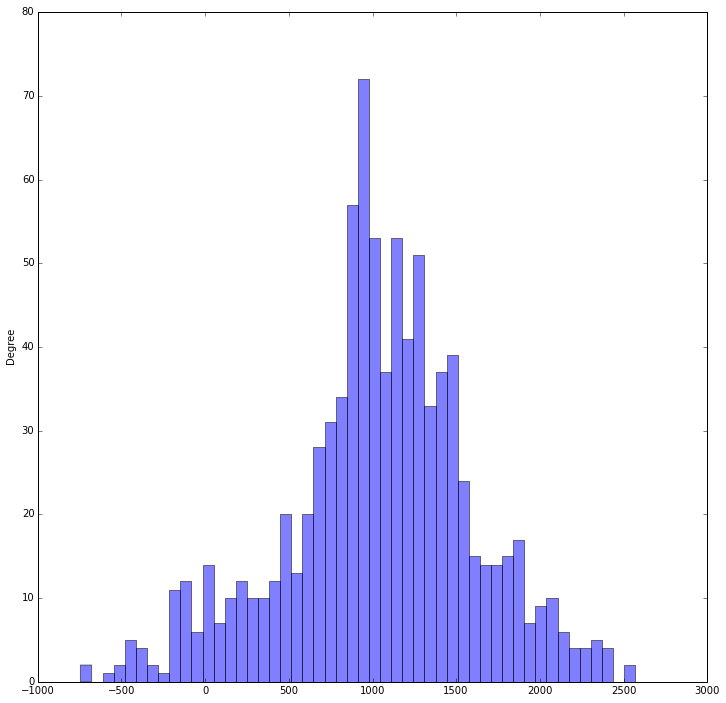

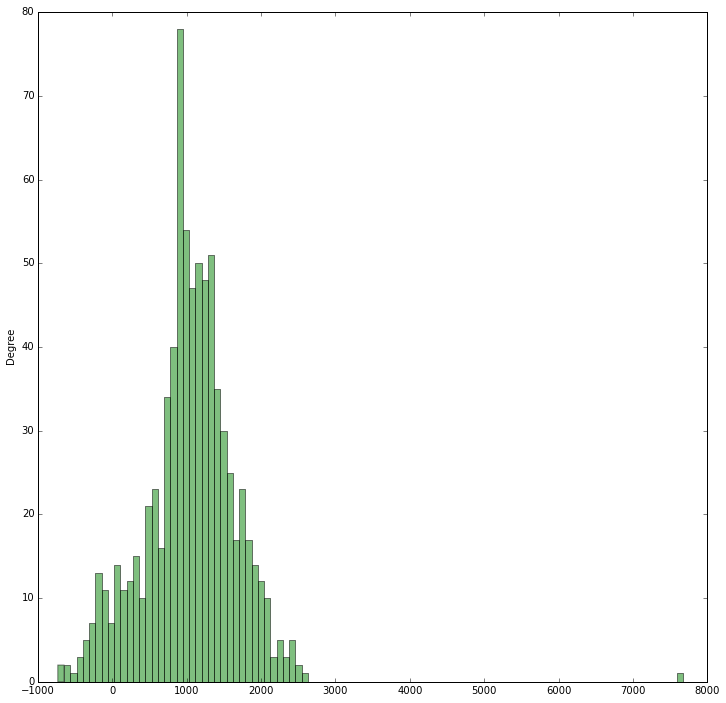

In [52]:
members['SRvel'].plot(kind='hist',color='blue', alpha=0.5, bins=50)
plt.show()
members['NRvel'].plot(kind='hist',color='green', alpha=0.5, bins=100)
plt.show()

In [53]:
members.loc[members['NRvel']> 7000]

,idEVC,idVC,ngc,RAdeg,DEdeg,FRAdeg,FDEdeg,Offset,SRvel,NRvel,...,gmag,egmag,rmag,ermag,imag,eimag,zmag,ezmag,rad,r50
1182,1183,NaN,NaN,192.4152,12.6259,192.4146,12.6253,2.8596,834.4,7669.2,...,15.01,0.02,14.44,0.02,14.17,0.02,14.07,0.032,108.17,21.86


In [54]:
print "another outlier"
members['NRvel'][1182]=np.nan


another outlier


/home/ondrej/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


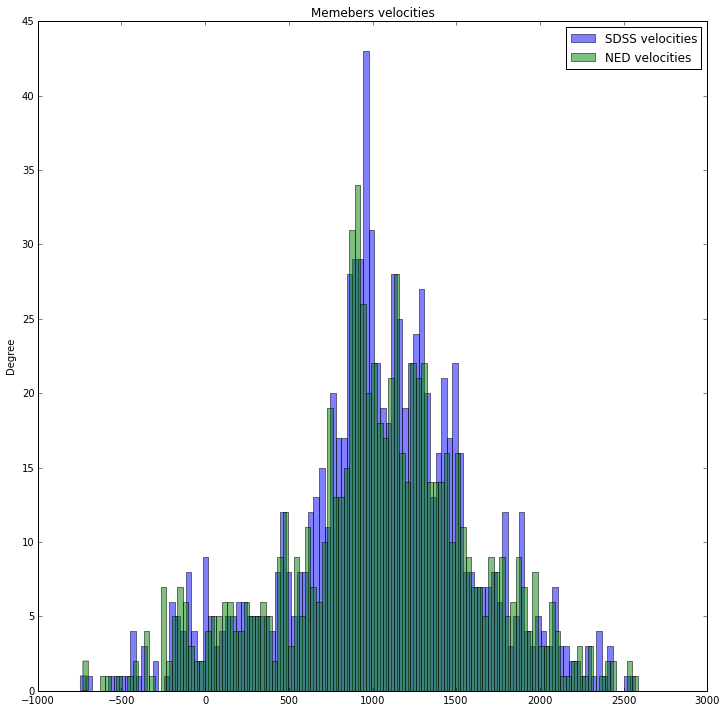

In [55]:
members['SRvel'].plot(kind='hist',color='blue', alpha=0.5, bins=100, label="SDSS velocities")
members['NRvel'].plot(kind='hist',color='green', alpha=0.5, bins=100, label="NED velocities")
plt.title("Memebers velocities")
plt.legend()
plt.show()

so they have roughly the same spread, so we can either use one, or both, or see which one provides data for more galaxies

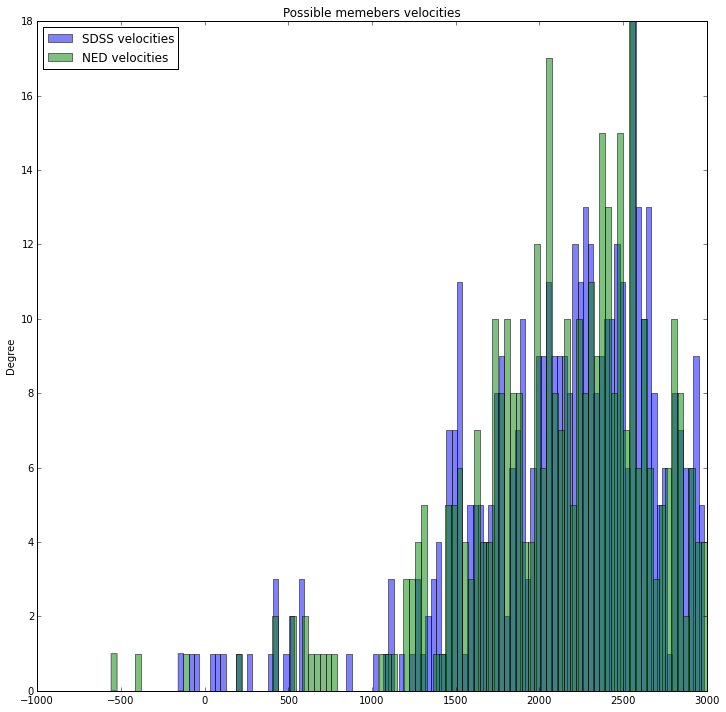

In [56]:
f = plt.figure()
possible_memb['SRvel'].plot(kind='hist',color='blue', alpha=0.5, bins=100, label="SDSS velocities")
possible_memb['NRvel'].plot(kind='hist',color='green', alpha=0.5, bins=100, label="NED velocities")
plt.title("Possible memebers velocities")
plt.legend(loc = "upper left")
plt.show()

this is strange, it's like they have been cut for some reason at 3000 ... 

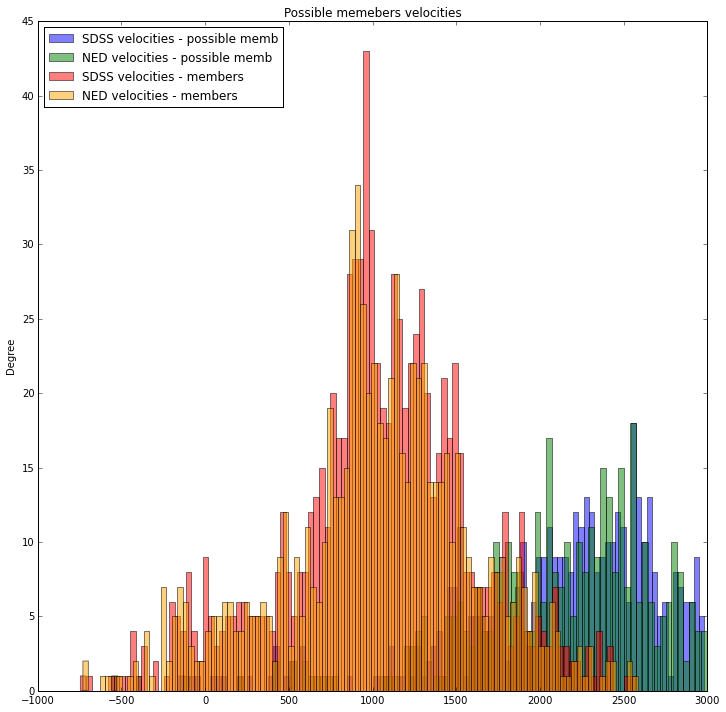

In [57]:
f = plt.figure()
possible_memb['SRvel'].plot(kind='hist',color='blue', alpha=0.5, bins=100, label="SDSS velocities - possible memb")
possible_memb['NRvel'].plot(kind='hist',color='green', alpha=0.5, bins=100, label="NED velocities - possible memb")
members['SRvel'].plot(kind='hist',color='red', alpha=0.5, bins=100, label="SDSS velocities - members")
members['NRvel'].plot(kind='hist',color='orange', alpha=0.5, bins=100, label="NED velocities - members")

plt.title("Possible memebers velocities")
plt.legend(loc = "upper left")
plt.show()

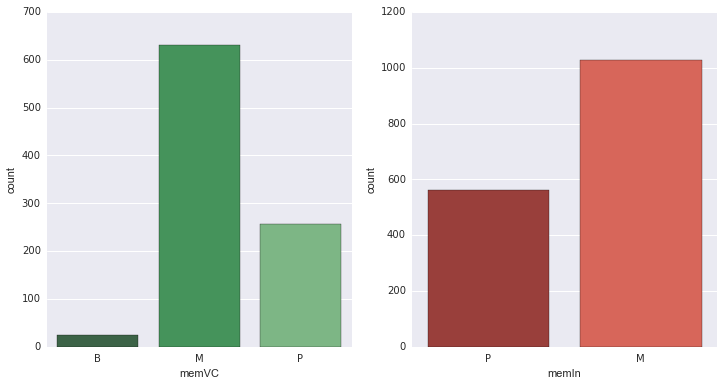

In [82]:
import seaborn as sns

f=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=data['memVC'],palette='Greens_d')
plt.subplot(1,2,2)
sns.countplot(x=data['memIn'],palette='Reds_d')


In [89]:
data.groupby('memIn').count()

,idEVC,idVC,ngc,RAdeg,DEdeg,FRAdeg,FDEdeg,Offset,SRvel,NRvel,...,gmag,egmag,rmag,ermag,imag,eimag,zmag,ezmag,rad,r50
memIn,,,,,,,,,,,,,,,,,,,,,
M,1028,736,210,1028,1028,890,890,890,890,779,...,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028
P,561,177,83,561,561,434,434,434,434,374,...,561,561,561,561,561,561,561,561,561,561
